The following tutorial aims to provide step-by-step instructions for training and testing a Random Forest Classifier with gut microbiome relative abundance data. The metagenomic files were retrieved from SRA accession PRJNA454826 and comprise paired-end whole genome sequencing (WGS) reads. This data was analyzed and processed in the HIVE platform where both HIVE-Hexagon and Censuscope were utilized to perform sequence alignment and taxonomic profiling, respectively. 

NOTE: Make sure to run, by clicking the arrow key next to the Python code, for each step prior to moving on to the next step to ensure all necessary information is loaded. 

Step 1: The first step is to import all necessary packages that are needed to conduct this ML training and testing. Run the first python box, and make sure you see "Ready to Go" as your output.  

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
print("Ready to Go")

Ready to Go


NOTE: Before you begin the next step make sure the "upsampled_data.csv" is saved in the same folder as this tutorial. 

Step 2: Once you have successfully importated all necessary packages, the next step will uplod the final table that will be used to train and test our random forest classifier (DTC). Successful loading should result in "Table Loaded" as the output after running that cell. 

In [73]:
train_table = pd.read_csv("upsampled_data.csv")
train_table = train_table.drop([])
print("Table Loaded")

Table Loaded


Step 3: This next portion splits the dataset into a training and testing set, where 25% of the table will be reserved for testing. 

In [ ]:
X = train_table.drop(["Status", "Reference"], axis=1)
y = train_table["Status"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25 ,random_state=123)
print("Ready to Go")

Step 4: The next step is to train the random forest and view it's performance metrics. 

In [74]:
RF = RandomForestClassifier(random_state=123)
RF.fit(X_train,y_train)
print(f'RandomForestClassifier train score: {RF.score(X_train,y_train)}')
print(f'RandomForestClassifier test score:  {RF.score(X_test,y_test)}')
print(confusion_matrix(y_test, RF.predict(X_test)))
print(classification_report(y_test, RF.predict(X_test)))

RandomForestClassifier train score: 1.0
RandomForestClassifier test score:  0.9
[[7 0]
 [1 2]]
              precision    recall  f1-score   support

          NR       0.88      1.00      0.93         7
           R       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



Notice how the model is able to predict response outcome at 90% accuracy. 

Step 5: Now that we have viewed the performance metrics. The next step is to visualize feature importance. This shows us what bacteria are the most helpful for predicting response to exercise for prediabetes intervention. 

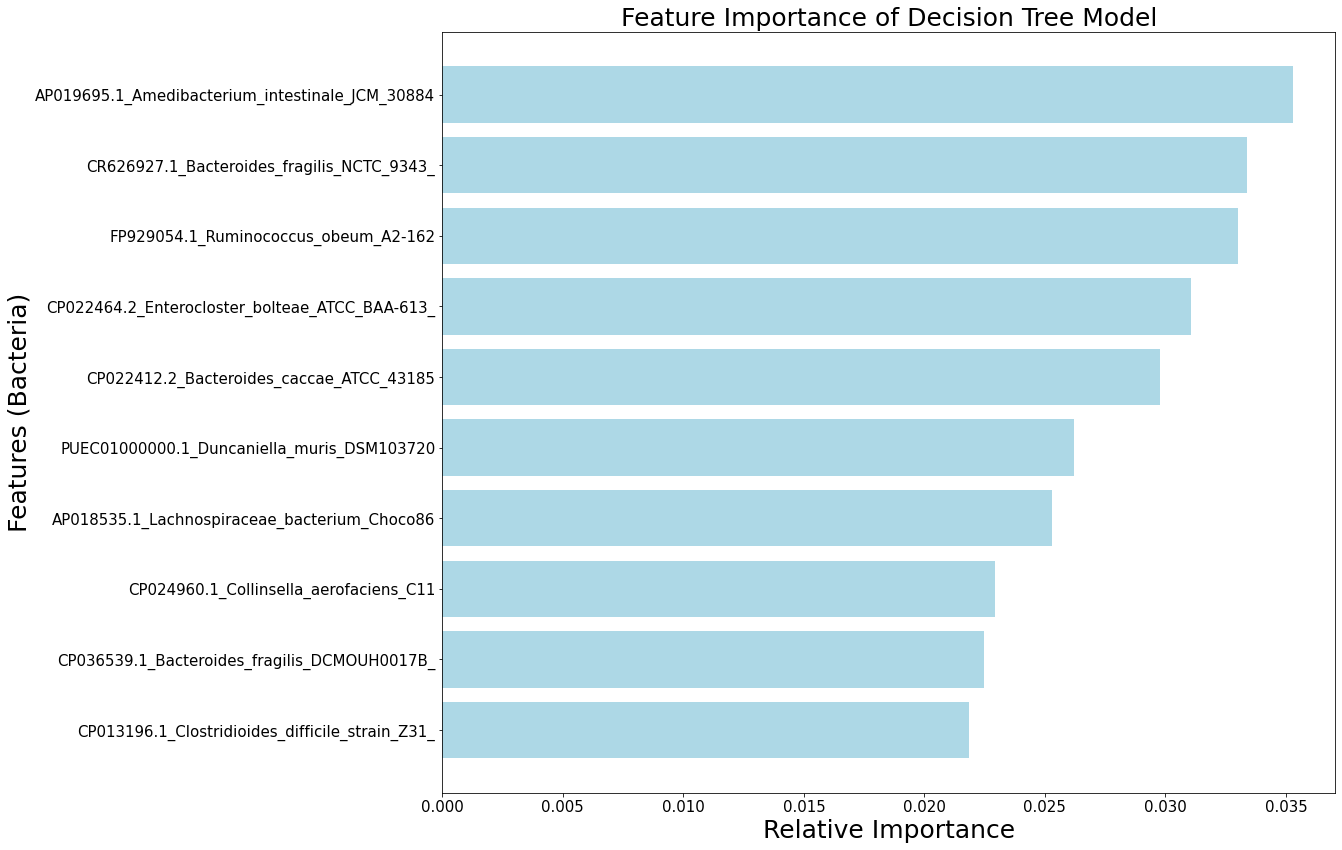

In [76]:
feature_names = train_table.columns.drop(["Reference", "Status"])
features = feature_names
importances = RF.feature_importances_
indices = np.argsort(importances)
num_features = 10
plt.figure(figsize=(16,14))
plt.title('Feature Importances')
# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='lightblue', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
fontsize = 25
plt.title("Feature Importance of Decision Tree Model", fontsize=fontsize)
plt.xlabel('Relative Importance', fontsize=fontsize)
plt.ylabel("Features (Bacteria)", fontsize=fontsize) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()